In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

### Total no. of artifacts in dataset

In [2]:
DATASET_NAME = 'dataset-rgbd-Test-2021-09-01-14-57-59'
DATASET_PATH = Path(f'/mnt/datasets/{DATASET_NAME}')

In [7]:
SAMPLE_PICKLE_PATH = 'scans/048f26e0-073e-11ec-abef-43e532deb910/100/pc_0490ad80-073e-11ec-abef-4f801ac83047_2021-08-27-13-52-17-471100_100_1.p'
!ls /mnt/datasets/{DATASET_NAME}/{SAMPLE_PICKLE_PATH}
# ab575ae5-eecc-11eb-af66-e3654568dc70/100/pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p

/mnt/datasets/dataset-rgbd-Test-2021-09-01-14-57-59/scans/048f26e0-073e-11ec-abef-43e532deb910/100/pc_0490ad80-073e-11ec-abef-4f801ac83047_2021-08-27-13-52-17-471100_100_1.p


In [36]:
!du /mnt/datasets/{DATASET_NAME} -sh --apparent-size

960M	/mnt/datasets/dataset-rgbd-Test-2021-09-01-14-57-59


In [37]:
# Check resolution of rgbd
for fpath_pickle in tqdm(DATASET_PATH.glob('**/*.p')):
    rgbd, targets = pickle.load(open(fpath_pickle, "rb"))
    assert rgbd.shape == (240, 180, 4), fpath_pickle

1452it [00:50, 28.67it/s]


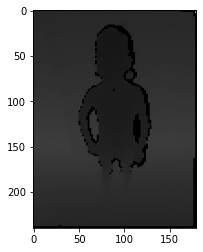

In [8]:
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
_ = plt.imshow(np.squeeze(rgbd[:, :, 0]), cmap='gray')
plt.show()

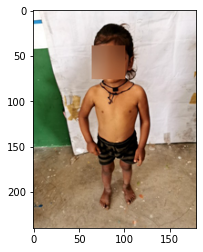

In [9]:
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
_ = plt.imshow(np.squeeze(rgbd[:, :, 1:]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(240, 180, 3)


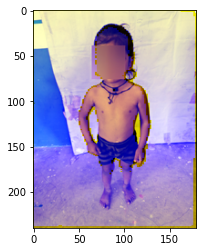

In [10]:
# Visualize R, G and depth layer
path = DATASET_PATH / SAMPLE_PICKLE_PATH
rgbd, targets = pickle.load(open(path, "rb"))
rgd = np.stack([rgbd[:, :, 1], rgbd[:, :, 2], rgbd[:, :, 0]*6.], axis=2)
print(rgd.shape)
_ = plt.imshow(np.squeeze(rgd))
plt.show()

In [11]:
rgbd[:, :, 0].min(), rgbd[:, :, 0].max()

(0.0, 0.7568)

In [12]:
print("targets: ", targets)
print("rgbd.shape: ", rgbd.shape)

targets:  {'file_path': '1630072337440/c2a65708-1f75-471a-95a5-f9a3b93b1335', 'timestamp': '2021-08-27-13-52-17-471100', 'scan_id': '0490ad80-073e-11ec-abef-4f801ac83047', 'scan_step': 100, 'scan_version': 'v0.9', 'height': 84.5, 'weight': 9.95, 'muac': 13.3, 'order_number': 1, 'format': 'rgbd', 'device_model': 'HUAWEI VOG-L29', 'person_id': '048f26e0-073e-11ec-abef-43e532deb910', 'age': 979, 'sex': 'male', 'file_path_rgb': '1630072338951/1b5ce768-36a0-4206-819a-0b1cc0e6aff6', 'rgb_timestamp': '2021-08-27-13-52-18-955529', 'device_pose': [-0.5191621171972739, -0.8538938613176806, -0.03655091888347257, 0.0, -0.0106324707443454, -0.03630986751662386, 0.9992840157266583, 0.0, -0.8546096457641437, 0.5191790318617532, 0.009771706195846594, 0.0, -0.34911937, 0.29918483, -0.13677283, 1.0], 'raw_header': '240x180_0.001_7_-0.35615167_0.60685265_0.6255485_-0.3370088_0.34911937_-0.29918483_0.13677283', 'angle': -31.277198675360417}
rgbd.shape:  (240, 180, 4)


In [13]:
artifacts = pd.read_csv(DATASET_PATH / 'labels.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 1452


,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,file_path_rgb,rgb_timestamp
0,1630058487112/ac6a7162-5088-4823-be37-750e0f21...,2021-08-27-10-01-27-118557,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,1,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488383/76065ed3-ee65-41ed-849a-44f290a6...,2021-08-27-10-01-28-399748
1,1630058487227/9518da48-a550-450f-8c56-52b2a2ac...,2021-08-27-10-01-27-243488,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,2,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488516/04375401-7f8f-4cd7-8149-9aa8ec84...,2021-08-27-10-01-28-524744
2,1630058487425/30628c3c-e7f0-4319-997a-00227f62...,2021-08-27-10-01-27-431062,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,3,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488671/1d7cdb45-644a-4312-8d56-ed9fbbaa...,2021-08-27-10-01-28-681003
3,1630058487568/18667e12-5fe9-4953-ae57-b87bad15...,2021-08-27-10-01-27-571675,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,4,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488833/beee2bf2-8f85-4864-a932-ff2e4138...,2021-08-27-10-01-28-852869
4,1630058487733/16c7c225-280a-4897-bbb5-b428afeb...,2021-08-27-10-01-27-743492,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,5,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488972/c6a7ca3d-268a-4248-a012-afefc8b9...,2021-08-27-10-01-28-993566


In [14]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,file_path_rgb,rgb_timestamp,Years
0,1630058487112/ac6a7162-5088-4823-be37-750e0f21...,2021-08-27-10-01-27-118557,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,1,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488383/76065ed3-ee65-41ed-849a-44f290a6...,2021-08-27-10-01-28-399748,2
1,1630058487227/9518da48-a550-450f-8c56-52b2a2ac...,2021-08-27-10-01-27-243488,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,2,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488516/04375401-7f8f-4cd7-8149-9aa8ec84...,2021-08-27-10-01-28-524744,2
2,1630058487425/30628c3c-e7f0-4319-997a-00227f62...,2021-08-27-10-01-27-431062,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,3,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488671/1d7cdb45-644a-4312-8d56-ed9fbbaa...,2021-08-27-10-01-28-681003,2
3,1630058487568/18667e12-5fe9-4953-ae57-b87bad15...,2021-08-27-10-01-27-571675,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,4,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488833/beee2bf2-8f85-4864-a932-ff2e4138...,2021-08-27-10-01-28-852869,2
4,1630058487733/16c7c225-280a-4897-bbb5-b428afeb...,2021-08-27-10-01-27-743492,ccd37960-071d-11ec-abef-2f39da406ca6,102,v0.9,86.0,12.55,15.2,5,rgbd,HUAWEI VOG-L29,ccd06c20-071d-11ec-abef-bb8c5448808e,941,male,1630058488972/c6a7ca3d-268a-4248-a012-afefc8b9...,2021-08-27-10-01-28-993566,2


### Total no. of children in the dataset

In [15]:
print("Total no. of artifacts:", len(artifacts))
unique_scan_ids = artifacts.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = artifacts.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 1452
Total no. of unique scan ids: 156
Total no. of unique person ids: 60


HUAWEI VOG-L29    1452
Name: device_model, dtype: int64


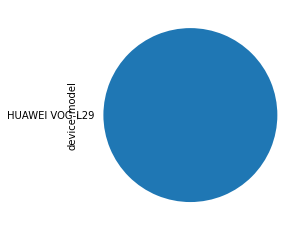

In [16]:
print(artifacts['device_model'].value_counts())
_ = artifacts['device_model'].value_counts().plot(kind='pie')

v0.9      1373
v1.0.2      64
v0.8        15
Name: scan_version, dtype: int64


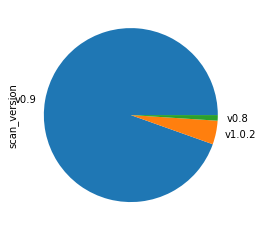

In [17]:
print(artifacts['scan_version'].value_counts())
_ = artifacts['scan_version'].value_counts().plot(kind='pie')

1     6
2    15
3    17
4    22
Name: Years, dtype: int64


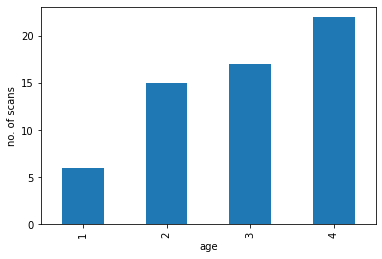

In [18]:
draw_age_distribution(unique_person_ids)

1    11
2    32
3    58
4    55
Name: Years, dtype: int64


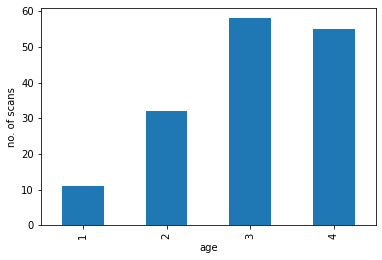

In [19]:
draw_age_distribution(unique_scan_ids)

100    752
102    700
Name: scan_step, dtype: int64


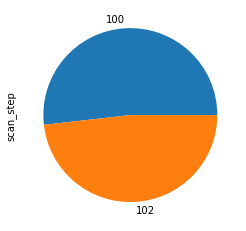

In [20]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['scan_step'].value_counts())
_ = artifacts['scan_step'].value_counts().plot(kind='pie')

In [21]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(artifacts, scan_type_colname)

2021-09-01 15:02:25,252 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/mhinsche1/code/Users/mhinsche/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,0,50,115,283,252
100,0,57,170,267,258


In [22]:
calculate_code_age_distribution(unique_scan_ids, scan_type_colname)

2021-09-01 15:02:25,914 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/mhinsche1/code/Users/mhinsche/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,0,5,16,29,28
100,0,6,16,29,27


### Distribution of height, weight and age against each other

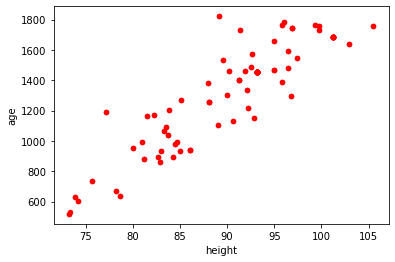

In [23]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')


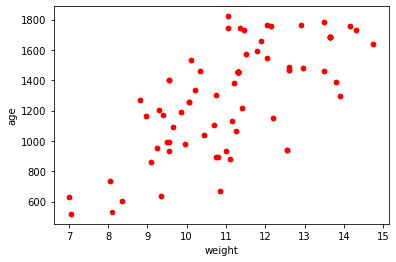

In [24]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

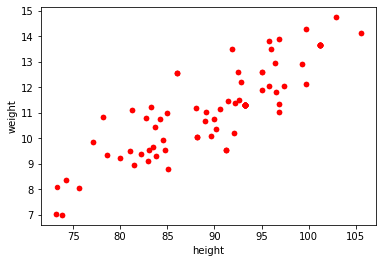

In [25]:
## distribution of height against weight
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [26]:
artifacts.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,100.964187,90.229959,11.257645,13.686433,5.866391,1314.396006,3.007576
std,0.999703,7.585553,1.696136,0.993508,3.886579,339.201512,0.918047
min,100.000000,73.200000,7.000000,11.500000,1.000000,519.000000,1.000000
25%,100.000000,84.200000,10.100000,12.900000,3.000000,1057.750000,2.000000
50%,100.000000,92.200000,11.300000,13.700000,5.000000,1457.000000,3.000000
75%,102.000000,95.800000,12.550000,14.300000,8.000000,1574.000000,4.000000
max,102.000000,105.500000,14.750000,16.100000,27.000000,1822.000000,4.000000


In [27]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,101.000000,90.099359,11.192949,13.650000,1.102564,1313.262821,3.006410
std,1.003221,7.622052,1.701389,0.990699,0.602998,339.379303,0.919304
min,100.000000,73.200000,7.000000,11.500000,1.000000,519.000000,1.000000
25%,100.000000,84.100000,10.025000,12.900000,1.000000,1057.750000,2.000000
50%,101.000000,91.900000,11.300000,13.600000,1.000000,1401.000000,3.000000
75%,102.000000,95.800000,12.287500,14.150000,1.000000,1574.000000,4.000000
max,102.000000,105.500000,14.750000,16.100000,5.000000,1822.000000,4.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [29]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [30]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [31]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [32]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 0


[]

In [33]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) Check height

In [34]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [35]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]